In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Package for import financial data
import yfinance as yf
from yahoofinancials import YahooFinancials

# Downloading the data

In [3]:
sanofi_df = yf.download('SAN', 
                      start='2014-12-01', 
                      end='2019-12-10', 
                      progress=False)

airbus_df = yf.download('AIR', 
                      start='2014-12-01', 
                      end='2019-12-10', 
                      progress=False)

carrefour_df = yf.download('CA.PA', 
                      start='2014-12-01', 
                      end='2019-12-10', 
                      progress=False)

ca_df = yf.download('ACA', 
                      start='2014-12-01', 
                      end='2019-12-10', 
                      progress=False)

al_df = yf.download('AI', 
                      start='2014-12-01', 
                      end='2019-12-10', 
                      progress=False)

In the following part, we manage data and transform them to returns.

In [4]:
sanofi = pd.DataFrame(sanofi_df)
sanofi = sanofi.rename(columns={"Close" : "sanofi"})
# Transform to returns
sanofi = sanofi["sanofi"].pct_change()
sanofi = np.log(1 + sanofi)
sanofi = sanofi.reset_index(drop=True)

airbus = pd.DataFrame(airbus_df)
airbus = airbus.rename(columns={"Close" : "airbus"})
# Transform to returns
airbus = airbus["airbus"].pct_change()
airbus = np.log(1 + airbus)
airbus = airbus.reset_index(drop=True)

carrefour = pd.DataFrame(carrefour_df)
carrefour = carrefour.rename(columns={"Close" : "carrefour"})
# Transform to returns
carrefour = carrefour["carrefour"].pct_change()
carrefour = np.log(1 + carrefour)
carrefour = carrefour.reset_index(drop=True)

ca = pd.DataFrame(ca_df)
ca = ca.rename(columns={"Close" : "credit_agricole"})
# Transform to returns
ca = ca["credit_agricole"].pct_change()
ca = np.log(1 + ca)
ca = ca.reset_index(drop=True)

al = pd.DataFrame(al_df)
al = al.rename(columns={"Close" : "air_liquide"})
# Transform to returns
al = al["air_liquide"].pct_change()
al = np.log(1 + al)
al = al.reset_index(drop=True)

In [5]:
# Concatene all the variables
data = pd.concat([sanofi, airbus, carrefour, ca, al], axis=1)

In [6]:
# We select the date variable in order to get the year of each day. It will permit to display colors in the PCA
ok = pd.DataFrame(carrefour_df.index.year)
date = ok["Date"].astype('str')

base = pd.concat([data, date], axis=1)

In [7]:
# We replace NAN values caused by the return computing
base = base.fillna(0)

In [8]:
# Display of the work basis
base

,sanofi,airbus,carrefour,credit_agricole,air_liquide,Date
0,0.000000,0.000000,0.000000,0.000000,0.000000,2014
1,0.002245,0.007012,-0.001378,-0.027847,0.009380,2014
2,0.012256,0.031712,-0.010496,0.040130,0.008581,2014
3,-0.016751,-0.007171,-0.031139,0.110333,-0.003209,2014
4,0.012311,0.015038,0.029345,-0.010685,-0.007528,2014
...,...,...,...,...,...,...
1279,0.000000,0.000000,-0.000677,0.000000,0.000000,2019
1280,0.000000,0.000000,-0.006453,0.000000,0.000000,2019
1281,0.000000,0.000000,-0.003755,0.000000,0.000000,2019
1282,0.000000,0.000000,0.029652,0.000000,0.000000,2019


In [9]:
# We drop the date variable in order to compute the PCA
data = base.drop(['Date'], axis=1)

# Modeling

We see in the following graph the explained variance with the eigenvalues.

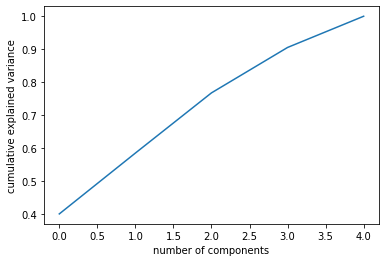

In [10]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
# We transform de data with the PCA method
x_pca = pca.transform(data)

In [18]:
# Here is our work table transformed by the PCA method. Each columns represent a component.
pd.DataFrame(x_pca)

,0,1,2,3,4
0,-0.000567,-0.000699,-0.000533,-0.001084,0.000058
1,-0.009807,-0.001531,0.000545,-0.012380,-0.026489
2,-0.033356,0.014609,0.014507,0.009952,0.036011
3,0.014960,0.013833,0.036061,0.016547,0.106749
4,-0.015965,0.005526,-0.029531,0.010213,-0.012803
...,...,...,...,...,...
1279,-0.000557,-0.000841,0.000128,-0.001068,0.000043
1280,-0.000469,-0.002050,0.005773,-0.000934,-0.000077
1281,-0.000510,-0.001485,0.003136,-0.000997,-0.000021
1282,-0.001021,0.005510,-0.029509,-0.001772,0.000676


In [13]:
# We select the first and the second component of our transformed data
ok = pd.DataFrame(x_pca[:,0:2])

# We merge our transformed data with the dummy variable "Date"
projection = pd.concat([ok, base['Date']], axis=1)

In [14]:
# We subset each rowss by the year in order display the date on the next PCA graph
base_2014 = projection[projection["Date"] == "2014"]
base_2015 = projection[projection["Date"] == "2015"]
base_2016 = projection[projection["Date"] == "2016"]
base_2017 = projection[projection["Date"] == "2017"]
base_2018 = projection[projection["Date"] == "2018"]
base_2019 = projection[projection["Date"] == "2019"]

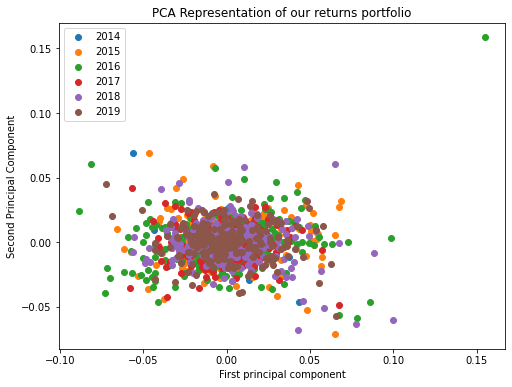

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(base_2014[0], base_2014[1], label = "2014")
plt.scatter(base_2015[0], base_2015[1], label = "2015")
plt.scatter(base_2016[0], base_2016[1], label = "2016")
plt.scatter(base_2017[0], base_2017[1], label = "2017")
plt.scatter(base_2018[0], base_2018[1], label = "2018")
plt.scatter(base_2019[0], base_2019[1], label = 2019)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("PCA Representation of our returns portfolio")
plt.legend()

Finally here is the PCA representation of our financial dataset. In this case, each day is representented by one point. 